### **Delhi Metro – Data Cleaning & Exploration Python Project**

Dataset- https://shorturl.at/DV4X6

## **Column Names with Short Descriptions**
1. TripID -> Unique identifier for each metro trip record.

2. Date -> Date on which the trip took place (later used to extract day, month, year).

3. From_Station -> Raw origin station name (contains inconsistent casing and spaces).

4. To_Station -> Raw destination station name (also unclean).

5. Distance_km -> Distance traveled during the trip in kilometers.

6. Fare -> Fare charged per passenger for that specific trip.

7. Cost_per_passenger -> Operational cost incurred by metro for carrying one passenger in that trip.

8. Passengers -> Total number of passengers who boarded for that trip (some missing values fixed).

9. Ticket_Type -> Type of ticket used (e.g., Smart Card, Token, QR Ticket).

10. Remarks -> Additional notes or comments (heavily missing and mostly irrelevant).

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
csv_path = r'/content/delhi_metro_raw.csv'
df_clean = pd.read_csv(csv_path)
df_clean

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak
...,...,...,...,...,...,...,...,...,...,...
149995,119880,2022-04-04,KIRTI NAGAR,AIIMS,5.13,100.48,20.33,28.0,Tourist Card,peak
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
149998,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend


## Cleaning `From_Station`,`To_Station` column as it has mixed name with leading and trailing spaces and also letters are in upper and lower case randamoly.

In [ ]:
df_clean['From_Station'].unique()

array(['Inderlok', 'Model Town', '   Kashmere Gate   ', 'Chandni Chowk',
       'Rajiv Chowk', 'Kalkaji Mandir', '  Pragati Maidan  ',
       'Mandi House', 'AIIMS', 'New Delhi', 'Netaji Subhash Place',
       'Punjabi Bagh', 'Rajouri Garden', '  Laxmi Nagar ', 'Kirti Nagar',
       'Old Delhi', 'Janakpuri West', 'Noida City Centre',
       'Pragati Maidan', 'Central Secretariat', ' Punjabi Bagh  ',
       'Dilshad Garden', ' Hauz Khas   ', 'Barakhamba Road',
       '   shivaji park ', '  Punjabi Bagh ', 'Jasola Vihar',
       '   new delhi   ', 'Laxmi Nagar', ' Punjabi Bagh   ',
       ' Old Delhi ', '   Kashmere Gate ', ' Rajiv Chowk  ', 'Hauz Khas',
       'Kashmere Gate', ' Pragati Maidan  ', '   Barakhamba Road  ',
       ' Kirti Nagar  ', '   AIIMS  ', '   Janakpuri West ',
       ' Kashmere Gate  ', ' kashmere gate  ', ' central secretariat   ',
       '   Kirti Nagar   ', '  Jasola Vihar ', ' Janakpuri West   ',
       '  Rajiv Chowk ', '  Barakhamba Road ', '   Kalkaji Mandir 

In [ ]:
df_clean['From_Station'] = df_clean['From_Station'].astype('str').str.strip().str.title()
df_clean['From_Station'].unique()

array(['Inderlok', 'Model Town', 'Kashmere Gate', 'Chandni Chowk',
       'Rajiv Chowk', 'Kalkaji Mandir', 'Pragati Maidan', 'Mandi House',
       'Aiims', 'New Delhi', 'Netaji Subhash Place', 'Punjabi Bagh',
       'Rajouri Garden', 'Laxmi Nagar', 'Kirti Nagar', 'Old Delhi',
       'Janakpuri West', 'Noida City Centre', 'Central Secretariat',
       'Dilshad Garden', 'Hauz Khas', 'Barakhamba Road', 'Shivaji Park',
       'Jasola Vihar'], dtype=object)

In [ ]:
df_clean['To_Station'] = df_clean['To_Station'].astype('str').str.strip().str.title()
df_clean['To_Station'].unique()

array(['Kashmere Gate', 'Dilshad Garden', 'Netaji Subhash Place',
       'Hauz Khas', 'Kalkaji Mandir', 'Shivaji Park', 'Jasola Vihar',
       'Central Secretariat', 'Chandni Chowk', 'Model Town',
       'Kirti Nagar', 'New Delhi', 'Laxmi Nagar', 'Barakhamba Road',
       'Janakpuri West', 'Punjabi Bagh', 'Mandi House', 'Old Delhi',
       'Noida City Centre', 'Pragati Maidan', 'Inderlok', 'Rajiv Chowk',
       'Rajouri Garden', 'Aiims'], dtype=object)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
df_clean[['Passengers','Ticket_Type','Remarks']].isnull().sum()

,0
Passengers,1500
Ticket_Type,1500
Remarks,26257


In [ ]:
df_clean[df_clean['Passengers'].isnull()]

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
342,86739,2024-05-24,Noida City Centre,Central Secretariat,3.68,59.52,73.14,NaN,Smart Card,festival
427,29385,2023-08-28,Rajiv Chowk,Kirti Nagar,2.04,61.58,27.92,NaN,Return,NaN
465,23948,2024-05-08,Dilshad Garden,Kirti Nagar,0.72,61.84,88.53,NaN,Single,NaN
471,23279,2023-10-10,AIIMS,Kirti Nagar,1.43,27.69,98.76,NaN,Smart Card,peak
543,21272,2022-07-25,Rajiv Chowk,Kashmere Gate,3.78,11.79,34.68,NaN,Smart Card,off-peak
...,...,...,...,...,...,...,...,...,...,...
149636,116353,2023-04-09,Kalkaji Mandir,Chandni Chowk,8.55,103.86,53.86,NaN,Return,weekend
149818,89046,2024-06-04,New Delhi,Model Town,1.38,67.08,20.91,NaN,Single,maintenance
149831,90085,2023-11-08,Noida City Centre,Mandi House,13.15,20.43,87.73,NaN,Single,NaN
149957,141700,2024-09-08,Kalkaji Mandir,Rajouri Garden,6.24,104.48,27.64,NaN,Return,maintenance


## 4) Handle missing `Passengers` values

- Imputed with median of the Passengers column


In [ ]:
median_of_passengers = int(df_clean['Passengers'].median(skipna=True))
print("Medain of passengers",median_of_passengers)

Medain of passengers 20


In [ ]:
# df_clean['Passengers'] = df_clean['Passengers'].fillna(median_of_passengers)

# print('Passengers nulls after replacing:', df_clean['Passengers'].isna().sum())

In [ ]:
df_clean['Ticket_Type'].value_counts()

,count
Ticket_Type,
Single,37341
Smart Card,37244
Return,37103
Tourist Card,36812


In [ ]:
df_clean[df_clean['Ticket_Type'].isnull()]

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
94,13859,2023-07-29,Chandni Chowk,AIIMS,1.06,193.26,112.80,22.0,NaN,peak
95,136207,2022-06-12,Rajouri Garden,Chandni Chowk,4.04,95.71,22.34,16.0,NaN,off-peak
112,7417,2022-11-30,Laxmi Nagar,Kashmere Gate,10.69,53.44,22.08,18.0,NaN,NaN
181,31814,2022-07-26,Kalkaji Mandir,Shivaji Park,6.21,67.18,42.22,16.0,NaN,festival
...,...,...,...,...,...,...,...,...,...,...
149731,76214,2022-01-08,Jasola Vihar,AIIMS,4.71,181.12,34.52,25.0,NaN,maintenance
149902,89136,2022-03-10,Pragati Maidan,Inderlok,9.98,164.92,49.39,20.0,NaN,NaN
149913,12667,2024-07-04,Janakpuri West,Pragati Maidan,1.61,24.11,106.42,25.0,NaN,weekend
149943,52996,2024-08-29,Noida City Centre,Barakhamba Road,5.98,122.23,31.74,22.0,NaN,weekend


In [ ]:
mask = (df_clean.index < 90000) & (df_clean['Ticket_Type'].astype(str).str.strip().str.lower() == 'return')
df_clean.loc[mask,"Ticket_Type"] = "Tourist Card"

In [ ]:
print(df_clean["Ticket_Type"].value_counts())

Ticket_Type
Tourist Card    59193
Single          37341
Smart Card      37244
Return          14722
Name: count, dtype: int64


In [ ]:
print('\nTicket_Type value counts (including NA):')

print(df_clean['Ticket_Type'].value_counts(dropna=False).head())


Ticket_Type value counts (including NA):
Ticket_Type
Tourist Card    60693
Single          37341
Smart Card      37244
Return          14722
Name: count, dtype: int64


In [ ]:
df_clean['Ticket_Type'].fillna(df_clean['Ticket_Type'].mode()[0])

,Ticket_Type
0,Smart Card
1,Tourist Card
2,Single
3,Tourist Card
4,Single
...,...
149995,Tourist Card
149996,Tourist Card
149997,Smart Card
149998,Single


In [ ]:
df_clean['Ticket_Type'].isnull().sum()

np.int64(1500)

## 1). After trying to fill NaN values with Mode of column values remain Null. So I got to know that these are actually string not real Null Values.

## 2) Handle 'NA' strings in `Ticket_Type` and missing entries

In [ ]:
# Replace 'NA' string with actual NaN and then inspect
df_clean['Ticket_Type'] = df_clean['Ticket_Type'].replace('NA', np.nan)   # Here we are replacing "NA" ->"NAN"

print('Ticket_Type nulls:', df_clean['Ticket_Type'].isnull().sum())

Ticket_Type nulls: 1500


In [ ]:
mode_ticket = df_clean['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)

#print("Now Null Values are",df_clean['Ticket_Type'].isnull().sum())

Mode ticket type: Tourist Card
Now Null Values are 0


# Dealing With `Remakrs` Columns.
- Handaling missing Values.

In [ ]:
df_clean[df_clean['Remarks'].isnull()]

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
5,96371,2024-07-10,Kalkaji Mandir,Shivaji Park,3.91,29.20,30.64,22.0,Tourist Card,NaN
17,109510,2023-02-06,Laxmi Nagar,Netaji Subhash Place,2.54,178.92,109.15,26.0,Smart Card,NaN
23,51011,2024-10-09,Janakpuri West,Kalkaji Mandir,1.00,67.80,53.12,25.0,Smart Card,NaN
27,25706,2023-08-12,Netaji Subhash Place,Old Delhi,8.10,44.74,21.62,16.0,Tourist Card,NaN
33,100419,2022-06-08,Hauz Khas,Pragati Maidan,0.88,135.12,21.57,15.0,Tourist Card,NaN
...,...,...,...,...,...,...,...,...,...,...
149978,130609,2024-11-29,Model Town,Shivaji Park,5.03,185.35,79.28,18.0,Smart Card,NaN
149984,770,2024-06-18,Rajouri Garden,Chandni Chowk,5.51,69.69,58.57,23.0,Tourist Card,NaN
149987,41091,2023-08-22,Barakhamba Road,Jasola Vihar,1.50,12.49,63.29,23.0,Return,NaN
149988,16024,2023-04-29,Punjabi Bagh,Noida City Centre,1.77,61.54,118.42,17.0,Return,NaN


In [ ]:
df_clean['Remarks'] = df_clean['Remarks'].replace('', np.nan)         # ye to simple hai, blank ko "NAN" se replace kr dete hai
print('Remarks nulls after conversion:', df_clean['Remarks'].isna().sum())

Remarks nulls after conversion: 26257


In [ ]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df_clean.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


# Data Exploration(Basic EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime as dt

In [ ]:
df = pd.read_csv('/content/delhi_metro_updated.csv')
df.head(10)

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak
5,96371,2024-07-10,Kalkaji Mandir,Shivaji Park,3.91,29.20,30.64,22.0,Tourist Card,NaN
6,49743,2022-09-02,Mandi House,Jasola Vihar,1.49,175.32,33.45,14.0,Tourist Card,peak
7,47390,2023-12-07,Mandi House,Central Secretariat,7.38,167.59,50.69,18.0,Tourist Card,festival
8,58379,2024-05-05,AIIMS,Chandni Chowk,2.57,125.25,81.71,24.0,Single,weekend
9,69048,2022-07-05,New Delhi,Jasola Vihar,7.58,151.39,37.76,19.0,Tourist Card,peak


In [ ]:
df.tail()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
149995,119880,2022-04-04,KIRTI NAGAR,AIIMS,5.13,100.48,20.33,28.0,Tourist Card,peak
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
149998,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend
149999,121959,2022-02-11,New Delhi,Central Secretariat,4.98,171.79,103.20,20.0,Single,NaN


In [ ]:
df.shape

(150000, 10)

In [ ]:
df.describe(include='all')

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
count,150000.000000,150000,150000,150000,150000.000000,150000.000000,150000.000000,148500.000000,148500,123743
unique,NaN,1095,663,24,NaN,NaN,NaN,NaN,4,5
top,NaN,2024-08-10,Rajiv Chowk,Hauz Khas,NaN,NaN,NaN,NaN,Tourist Card,off-peak
freq,NaN,183,15593,6372,NaN,NaN,NaN,NaN,59193,24859
mean,75000.500000,NaN,NaN,NaN,5.490446,105.116503,62.474807,20.003522,NaN,NaN
std,43301.414527,NaN,NaN,NaN,4.980333,54.879494,33.207161,4.468134,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.500000,10.000000,5.000000,4.000000,NaN,NaN
25%,37500.750000,NaN,NaN,NaN,1.940000,57.570000,33.687500,17.000000,NaN,NaN
50%,75000.500000,NaN,NaN,NaN,3.960000,105.170000,62.520000,20.000000,NaN,NaN
75%,112500.250000,NaN,NaN,NaN,7.420000,152.572500,91.190000,23.000000,NaN,NaN


In [ ]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')
df.isnull().sum()

Shape: (150000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


,0
TripID,0
Date,0
From_Station,0
To_Station,0
Distance_km,0
Fare,0
Cost_per_passenger,0
Passengers,1500
Ticket_Type,1500
Remarks,26257


**Conclusion**

1.   Passengers column have 1500 Null Values.
2.   Ticket Type has 1500 Null Values.
3.   Remarks have 26K+ Null Values.



In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
ticket_mode = df['Ticket_Type'].mode()[0]
df['Ticket_Type'].fillna(ticket_mode, inplace=True)

/tmp/ipython-input-1343622367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ticket_Type'].fillna(ticket_mode, inplace=True)


In [ ]:
median_passengers = df['Passengers'].median()
df['Passengers'].fillna(median_passengers,inplace=True)

/tmp/ipython-input-1981300248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Passengers'].fillna(median_passengers,inplace=True)


In [ ]:
df.drop_duplicates(subset='TripID',inplace=True)

In [ ]:
df['Day_Name'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [ ]:
df.loc[1:6,['Day_Name','Year']]

,Day_Name,Year
1,Thursday,2023
2,Thursday,2023
3,Thursday,2022
4,Sunday,2022
5,Wednesday,2024
6,Friday,2022


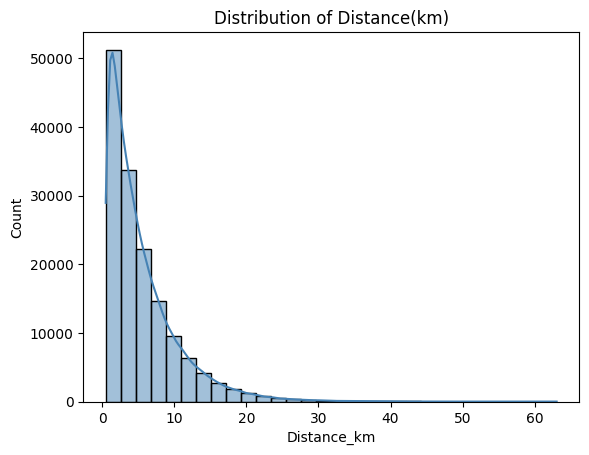

In [ ]:
sns.histplot(df['Distance_km'],kde=True,bins=30,color='steelblue')
plt.title("Distribution of Distance(km)")
plt.show()

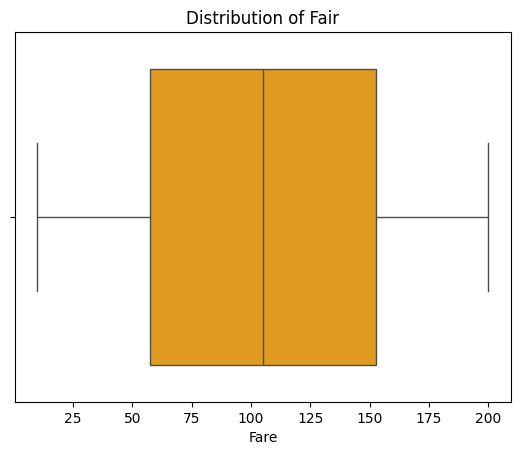

In [ ]:
sns.boxplot(x=df['Fare'],color='orange')
plt.title('Distribution of Fair')
plt.show()

/tmp/ipython-input-4009316341.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origin_stations.values,y=top_origin_stations.index,palette='Greens_r')


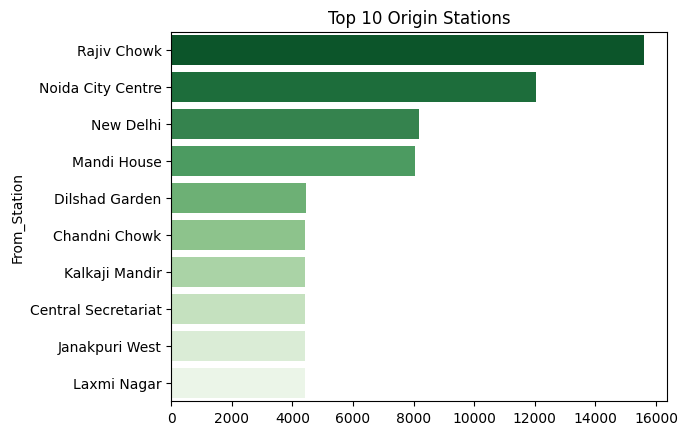

In [ ]:
# # 1. Understand which Stations are most used.
# df['From_Station'].value_counts().head(10).plot(kind='barh',color='Yellow')
# plt.title('Most Crowded Top-10 Stations')
# plt.xlabel('Metro Staion')
# plt.ylabel('Count')
# plt.show()


top_origin_stations = df['From_Station'].value_counts().head(10)
sns.barplot(x=top_origin_stations.values,y=top_origin_stations.index,palette='Greens_r')
plt.title("Top 10 Origin Stations")
plt.show()

/tmp/ipython-input-779966992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destination_station.values,y=top_destination_station.index,palette='Greens_r')


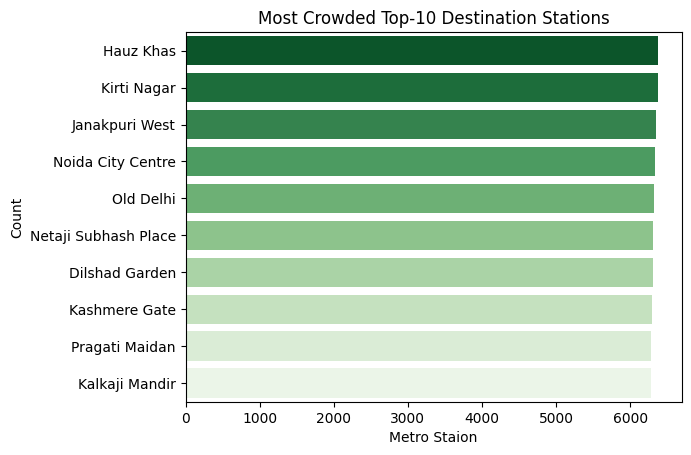

In [ ]:
top_destination_station = df['To_Station'].value_counts().head(10)
sns.barplot(x=top_destination_station.values,y=top_destination_station.index,palette='Greens_r')
plt.title('Most Crowded Top-10 Destination Stations')
plt.xlabel('Metro Staion')
plt.ylabel('Count')
plt.show()

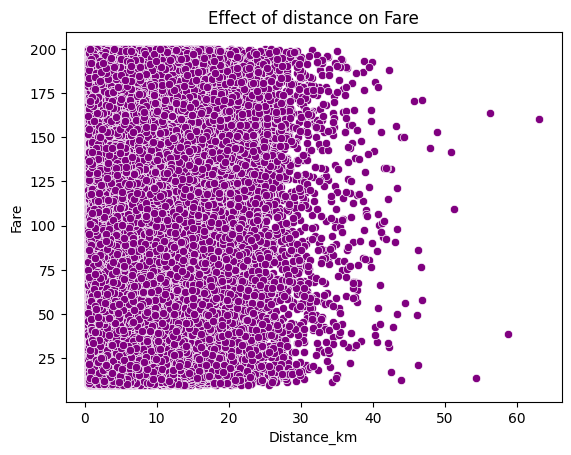

In [ ]:
sns.scatterplot(x='Distance_km',y='Fare',data=df,color='Purple')
plt.title("Effect of distance on Fare")
plt.show()

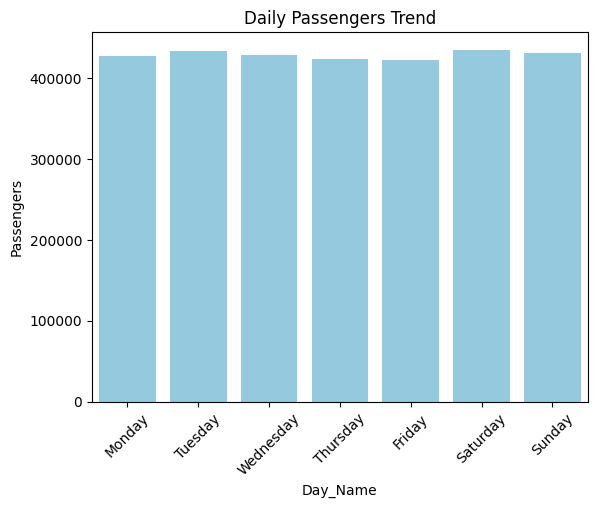

In [ ]:
daily = df.groupby('Day_Name')['Passengers'].sum().reset_index()
daily
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily['Day_Name'] = pd.Categorical(daily['Day_Name'],categories=weekday_order,ordered=True)
daily.sort_values('Day_Name',inplace=True)

sns.barplot(data=daily, x='Day_Name', y='Passengers', color='skyblue')
plt.title("Daily Passengers Trend")
plt.xticks(rotation=45)
plt.show()


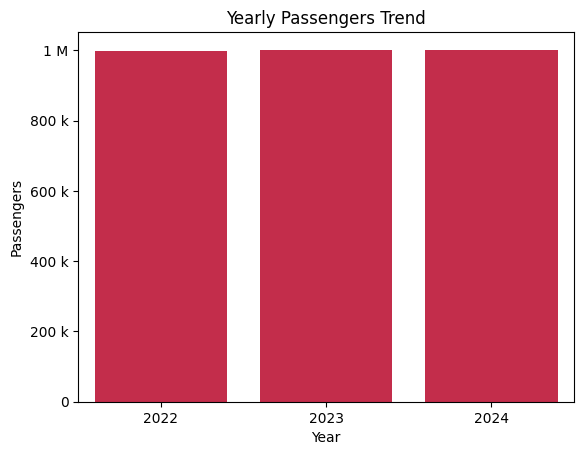

In [ ]:
import matplotlib.ticker as ticker
yearly = df.groupby('Year')['Passengers'].sum().reset_index()
ax = sns.barplot(data=yearly, x='Year', y='Passengers', color='crimson')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.title("Yearly Passengers Trend")
plt.show()


In [ ]:
df.groupby(['From_Station',])['Passengers'].sum()

,Passengers
From_Station,
AIIMS,4029.0
AIIMS,3592.0
AIIMS,2898.0
BARAKHAMBA ROAD,147.0
BARAKHAMBA ROAD,334.0
...,...
Pragati Maidan,35577.0
Punjabi Bagh,34582.0
Rajiv Chowk,312009.0


<Axes: xlabel='Ticket_Type'>

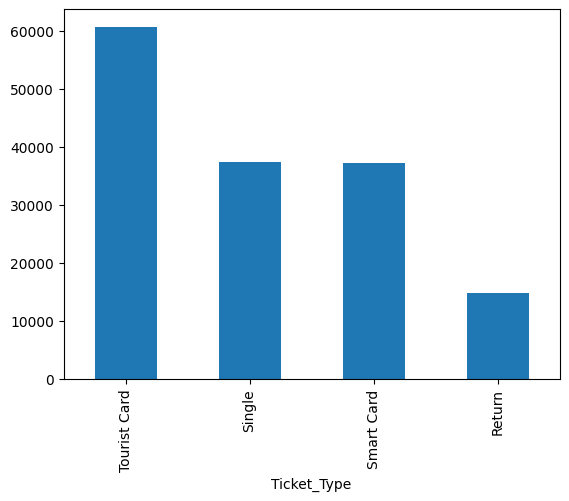

In [ ]:
df['Ticket_Type'].value_counts().plot(kind='bar')

In [ ]:
df['Remarks'].value_counts()

,count
Remarks,
off-peak,24859
festival,24812
maintenance,24771
weekend,24710
peak,24591


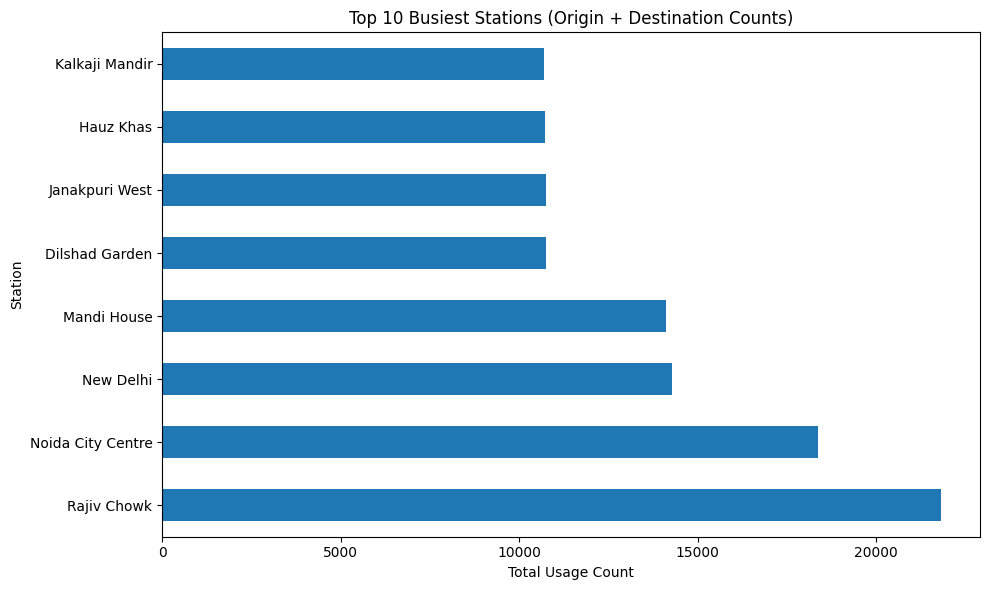

In [ ]:
## Total FootFall
plt.figure(figsize=(10,6))
total_station_count = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)
total_station_count.plot(kind='barh')
plt.title('Top 10 Busiest Stations (Origin + Destination Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

In [ ]:
df.From_Station.unique()

array(['Inderlok', 'Model Town', '   Kashmere Gate   ', 'Chandni Chowk',
       'Rajiv Chowk', 'Kalkaji Mandir', 'Mandi House', 'AIIMS',
       'New Delhi', 'Rajouri Garden', '  Laxmi Nagar ',
       'Noida City Centre', 'Janakpuri West', 'Central Secretariat',
       'Dilshad Garden', ' Hauz Khas   ', 'Jasola Vihar',
       '   new delhi   ', 'Laxmi Nagar', '   Kashmere Gate ',
       ' Rajiv Chowk  ', 'Hauz Khas', 'Kashmere Gate', '   AIIMS  ',
       '   Janakpuri West ', ' Kashmere Gate  ', ' kashmere gate  ',
       ' central secretariat   ', '  Jasola Vihar ', ' Janakpuri West   ',
       '  Rajiv Chowk ', '   Kalkaji Mandir  ', '   Rajiv Chowk   ',
       ' New Delhi  ', '   Inderlok ', ' AIIMS ', ' LAXMI NAGAR  ',
       '   Rajouri Garden  ', '   central secretariat  ',
       '   hauz khas  ', '   Rajouri Garden ', ' Inderlok  ',
       '  kashmere gate   ', '   HAUZ KHAS  ', ' rajouri garden ',
       ' Chandni Chowk   ', '  CHANDNI CHOWK   ', '  CHANDNI CHOWK  ',
       '  

1. saggrigation of stations based on the lines.


In [ ]:
def clean_station_name(name):
  if pd.isna(name):
    return None
  return name.strip().lower().title()

In [ ]:
df['From_Station'] = df['From_Station'].apply(clean_station_name)
df['To_Station'] = df['To_Station'].apply(clean_station_name)

In [ ]:
df.From_Station.unique()

array(['Inderlok', 'Model Town', 'Kashmere Gate', 'Chandni Chowk',
       'Rajiv Chowk', 'Kalkaji Mandir', 'Mandi House', 'Aiims',
       'New Delhi', 'Rajouri Garden', 'Laxmi Nagar', 'Noida City Centre',
       'Janakpuri West', 'Central Secretariat', 'Dilshad Garden',
       'Hauz Khas', 'Jasola Vihar', 'Punjabi Bagh', 'Shivaji Park',
       'Old Delhi', 'Netaji Subhash Place', 'Barakhamba Road',
       'Pragati Maidan', 'Kirti Nagar'], dtype=object)

In [ ]:
df.To_Station.unique()

array(['Kashmere Gate', 'Dilshad Garden', 'Netaji Subhash Place',
       'Hauz Khas', 'Kalkaji Mandir', 'Shivaji Park', 'Jasola Vihar',
       'Central Secretariat', 'Chandni Chowk', 'Model Town',
       'Kirti Nagar', 'New Delhi', 'Laxmi Nagar', 'Barakhamba Road',
       'Janakpuri West', 'Punjabi Bagh', 'Mandi House', 'Old Delhi',
       'Noida City Centre', 'Pragati Maidan', 'Inderlok', 'Rajiv Chowk',
       'Rajouri Garden', 'Aiims'], dtype=object)

In [ ]:
red = {
    'Kashmere Gate', 'Dilshad Garden', 'Inderlok',
    'Netaji Subhash Place', 'Old Delhi','Seelampur','Shahdara',
    'Welcome','Shaheed Sthal'
}

yellow = {
    'Kashmere Gate', 'New Delhi', 'Chandni Chowk', 'Central Secretariat',
    'Hauz Khas', 'Aiims', 'Model Town', 'Rajiv Chowk'
}

blue = {
    'Janakpuri West', 'Kirti Nagar', 'Laxmi Nagar', 'Barakhamba Road',
    'Pragati Maidan', 'Noida City Centre', 'Rajouri Garden', 'Mandi House',

}

violet = {
    'Kalkaji Mandir', 'Jasola Vihar', 'Central Secretariat', 'Mandi House'
}

green = {
    'Punjabi Bagh', 'Shivaji Park'
}


In [ ]:
station_to_line = {}
for st in red:
  station_to_line[st] = "Red"
for st in yellow:
  station_to_line[st] = 'Yellow'
for st in blue:
    station_to_line[st] = 'Blue'
for st in violet:
    station_to_line[st] = 'Violet'
for st in green:
    station_to_line[st] = 'Green'


In [ ]:
def get_line(row):
    from_line = station_to_line.get(row['From_Station'])
    # to_line   = station_to_line.get(row['To_Station'])

    if from_line:
        return from_line
    # if to_line:
    #     return to_line
    return "Unknown"


In [ ]:
df['Metro_Line'] = df.apply(get_line, axis=1)

In [ ]:
df.set_index('index',inplace=True)

In [ ]:
df

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks,Day_Name,Month_Name,Year,Metro_Line
index,,,,,,,,,,,,,,
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance,Sunday,May,2022,Red
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance,Thursday,January,2023,Yellow
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak,Thursday,July,2023,Yellow
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance,Thursday,November,2022,Yellow
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak,Sunday,November,2022,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,119880,2022-04-04,Kirti Nagar,Aiims,5.13,100.48,20.33,28.0,Tourist Card,peak,Monday,April,2022,Blue
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak,Wednesday,October,2023,Yellow
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival,Tuesday,February,2023,Blue


In [ ]:
line_colors = {
    "Red": "#DA291C",
    "Yellow": "#FFD300",
    "Blue": "#0072CE",
    "Green": "#009739",
    "Violet": "#8F00FF",
    "Unknown": "gray"
}

In [ ]:
colors = result['Metro_Line'].map(line_colors)

**Conclusion**

*   According to the data Yellow Line is the most used line.


* Blue Line is the second most used line. almost 80K passengers travel on Blue line.




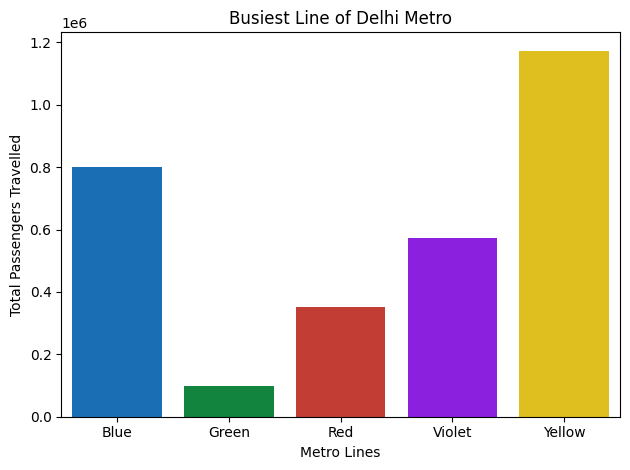

In [ ]:
import matplotlib.ticker as ticker
result = df.groupby('Metro_Line')['Passengers'].sum().reset_index()
sns.barplot(data=result,x='Metro_Line',y='Passengers',hue='Metro_Line',palette=line_colors,dodge=False,legend=False)
plt.title('Busiest Line of Delhi Metro')
plt.xlabel('Metro Lines')
plt.ylabel('Total Passengers Travelled')
plt.tight_layout()
plt.show()

In [ ]:
df['Profit'] = (df['Fare'] - df['Cost_per_passenger']) * df['Passengers']
df[['TripID','Profit']].sort_values(by='TripID')

,TripID,Profit
index,,
11513,1,-712.16
80880,2,-510.51
105155,3,-240.96
51482,4,1835.99
16461,5,1476.16
...,...,...
127499,149996,-189.64
98719,149997,-659.09
57820,149998,2819.60


In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)


In [ ]:
monthly_profit = df.groupby('Month_Name')['Profit'].sum().reset_index()

/tmp/ipython-input-2195342107.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_profit = df.groupby('Month_Name')['Profit'].sum().reset_index()


**Conclusion**

***Monthly Profit of Delhi Metro***



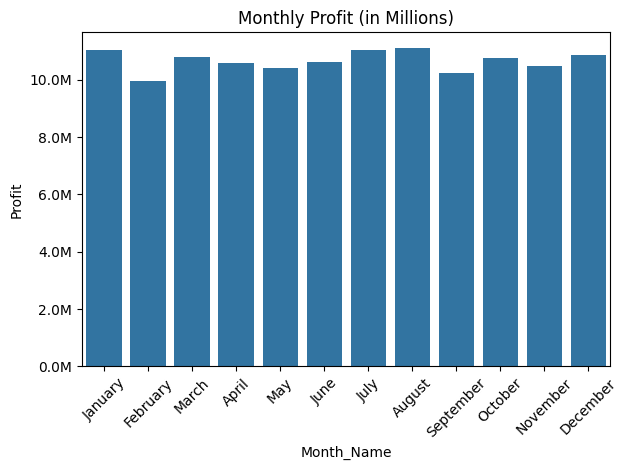

In [ ]:
import matplotlib.ticker as mtick

ax = sns.barplot(data=monthly_profit, x='Month_Name', y='Profit')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation=45)
plt.title('Monthly Profit (in Millions)')
plt.tight_layout()
plt.show()


**Revenue/Profit in Delhi Metro by Ticket Type**
*   Tourist Card have approximate 50M profit per year
*  Then Smart Card and Single token have almost same profit, but by this insight we can find the conclusion that by giving some offers on smart card we can increase the profit and also control the rush over the metro station and also increase the passengers count.



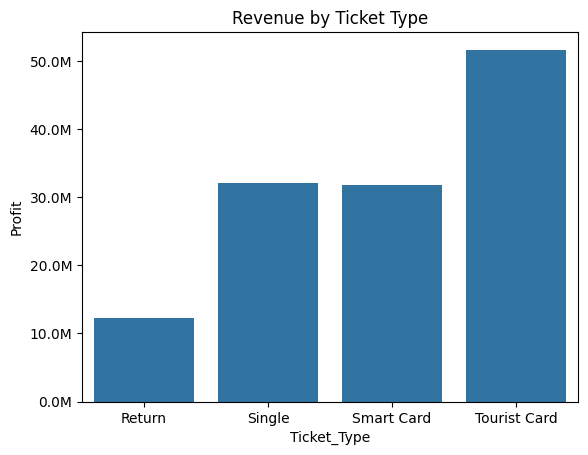

In [ ]:
profit_by_ticket_type = df.groupby('Ticket_Type')['Profit'].sum().reset_index()
ax = sns.barplot(data=profit_by_ticket_type, x='Ticket_Type', y='Profit')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title("Revenue by Ticket Type")
plt.show()


In [ ]:
# Average Fare per ticket type of passengers.
avg_fare = df.groupby('Ticket_Type')['Fare'].mean()
avg_fare

,Fare
Ticket_Type,
Return,104.588311
Single,105.440164
Smart Card,105.055084
Tourist Card,105.083182


In [ ]:
df.groupby(['Metro_Line', 'Ticket_Type']).size().reset_index(name='Count')


,Metro_Line,Ticket_Type,Count
0,Blue,Return,4223
1,Blue,Single,9939
2,Blue,Smart Card,9921
3,Blue,Tourist Card,16022
4,Green,Return,1257
5,Green,Single,1213
6,Green,Smart Card,1192
7,Green,Tourist Card,1298
8,Red,Return,2476
9,Red,Single,4370


**Count of Passengers Travelling on different lines of metro using Different Ticket-Type -> Smart-Card, Tourist Card etc.**

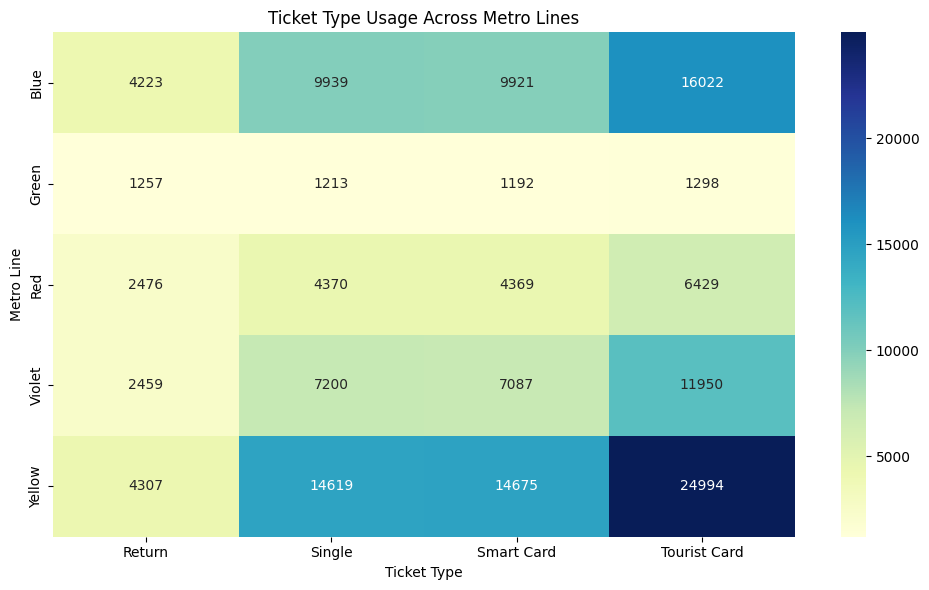

In [ ]:
#Group and pivot the data
line_ticket = df.groupby(['Metro_Line', 'Ticket_Type']).size().reset_index(name='Count')

pivot_table = line_ticket.pivot(index='Metro_Line', columns='Ticket_Type', values='Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title("Ticket Type Usage Across Metro Lines")
plt.xlabel("Ticket Type")
plt.ylabel("Metro Line")
plt.tight_layout()
plt.show()


1. The Delhi Metro dataset required extensive cleaning, especially for station names and missing values.

* Inconsistent naming formats, missing passengers/ticket types, and unstructured remarks were resolved to make the dataset analysis-ready.

2. New engineered features like Metro_Line, Revenue/Profit, Month, and Day improved interpretability and analytical depth.

* These features enabled financial analysis, temporal trends, and metro-line-level insights.

3. Passenger movement shows strong weekday patterns and clear monthly seasonality.

* Midweek peaks and weekend dips confirm office commuters are the primary users.

4. Yellow and Blue Lines are the busiest and most revenue-generating corridors.

* These lines contain major interchange and commercial hubs, explaining higher load and financial contribution.

5. Smart Cards dominate ticket usage, indicating a large base of regular commuters.

* Occasional travelers mainly rely on Tokens/QR tickets, with more activity on tourist or residential corridors.

6. Profitability varies across lines and routes and does not always correlate with passenger volume.

* Differences in operational cost-per-passenger create profit disparities, showing where pricing or efficiency improvements are required.

7. Fare distribution shows most trips are in short-to-medium distance ranges.

8. The Delhi Metro network is structurally robust with clear dominant corridors connected by major interchange stations.

Nodes like Kashmere Gate, Rajiv Chowk, and Hauz Khas play a critical role in balancing passenger load.





In [ ]:
df_c = pd.read_csv('/content/delhi_metro_cleaned_Dataset.csv')
df_c

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Tourist Card,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak
...,...,...,...,...,...,...,...,...,...,...
149995,119880,2022-04-04,Kirti Nagar,Aiims,5.13,100.48,20.33,28.0,Tourist Card,peak
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
149998,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend


In [ ]:
df_c.isnull().sum()

,0
TripID,0
Date,0
From_Station,0
To_Station,0
Distance_km,0
Fare,0
Cost_per_passenger,0
Passengers,0
Ticket_Type,0
Remarks,26257
